# Assumption Mining for Monotone Systems

The code used to generate the figures for the paper [_Directed Specifications and Assumption Mining for Monotone Dynamical Systems_](http://www.eecs.berkeley.edu/~eskim/HSCC16_monotone.pdf), to appear at HSCC 2016.

#### Runtime Requirements
In addition to python 2.7 and ipython, you'll need the following:
- Timing profiler magic commands. Installation instructions found [here](http://pynash.org/2013/03/06/timing-and-profiling/)
- The [z3 theorem prover](https://github.com/Z3Prover/z3/wiki) with python API. On Mac OSX with [homebrew](http://brew.sh/), you can install it by running `brew install z3` in the terminal.

This notebook was generated on an early-2013 Retina Macbook Pro with 8GB of RAM and an 2.4GHz Intel Core i7 processor with python 2.7.11 and ipython notebook server 4.0.6.

In [1]:
%matplotlib notebook
%pylab

from mpl_toolkits.mplot3d import Axes3D

import os

import numpy as np

import AGmining as AG 
import integrator as single_int
from stl import G, F, STL

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Declare initial state and signal length
x0 = np.zeros(1)
T = 3
alpha = .75

# Declare STL Specification
def pred(x):
    return x <= 4.0
predicate = STL(pred_eval = pred)
def in_lower(x):
    a = G(F(predicate,a=0,b=2), a=0, b=1)
    return a(x)[0]

# Declare system
normal_system = single_int.integrator(a = .5, x0 = np.array([0]))

# Bound the disturbance space
lb = np.zeros([T])
ub = 10. * np.ones([T])

a_miner = AG.assumption_miner(system = normal_system, checkspec = in_lower, mine_init_states = False,\
                    T = T, epsilon = 6, epsilon_final = .25, max_num_points = 2000,\
                    lower_bound = lb, upper_bound = ub, learningrate = alpha,\
                    init_state = x0)

# Mine and check results
a_miner.mine()
assert(a_miner.check_miner()), "Assumption miner failed check"

Points:  0 , epsilon:  6
Miner terminated


# Plot Assumption Set

**NOTE**: The figure generated in the paper was rendered via the [plotly](https://plot.ly/) engine but was obtained using the same data. A user who runs the executes the code in the notebook will be able view the assumption set at different angles. Otherwise, you can manipulate the assumption set without running this notebook with plotly.

<IPython.core.display.Javascript object>


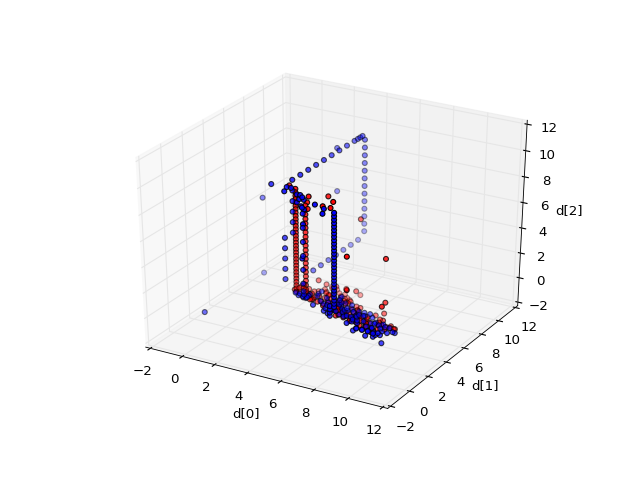

In [3]:
# Extract assumption points
lower_points = a_miner.lower_points
upper_points = a_miner.upper_points

# Plot figure. To make interactive, replace 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lower_points[:,0], lower_points[:,1], lower_points[:,2], c= 'b', marker = 'o')
ax.scatter(upper_points[:,0], upper_points[:,1], upper_points[:,2], c= 'r', marker = 'o')
ax.set_xlabel('d[0]')
ax.set_ylabel('d[1]')
ax.set_zlabel('d[2]')
plt.show()

# Plotly Visualization of Assumption Set

Required: API token from plotly. To use the API, edit `py_username` and `py_apikey` on line 4.

In [4]:
import plotly.plotly as py
from plotly.graph_objs import *

py_username = 'username here'; py_apikey = 'api key here'
py.sign_in(py_username, py_apikey)

# Extract assumption points
lower_points = a_miner.lower_points
upper_points = a_miner.upper_points

# Lower points
x_lower = lower_points[:,0]
y_lower = lower_points[:,1]
z_lower = lower_points[:,2]
trace1 = Scatter3d(
    x = x_lower,
    y = y_lower,
    z = z_lower,
    mode='markers',
    name='Lower Set Members',
    marker=Marker(
        size=5,
        line=Line(
            color='rgba(217, 0,0, 0.14)',
            width=0.02
        ),
        opacity=0.8
    )
)

# Upper points
x_upper = upper_points[:,0]
y_upper = upper_points[:,1]
z_upper = upper_points[:,2]
trace2 = Scatter3d(
    x = x_upper,
    y = y_upper,
    z = z_upper,
    mode='markers',
    name='Upper Set Members',
    marker=Marker(
        size=5,
        line=Line(
            color='rgba(0,0, 217, 0.14)',
            width=0.02
        ),
        opacity=0.8
    )
)

data = Data([trace1, trace2])

layout = Layout(
    margin=Margin(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=Scene(
        xaxis=XAxis(
            title='d[0]'
        ),
        yaxis=YAxis(
            title='d[1]'
        ),
        zaxis=ZAxis(
            title='d[2]'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig)